# Numpy introduction (part I)

**Note**: This notebooks is not really a ready-to-use tutorial but rather serves as a table of contents that we will fill during the short course. It might later be useful as a memo, but it clearly lacks important notes and explanations.

There are lots of tutorials that you can find online, though.

Useful ressources:

Official Numpy documentation

- [Numpy quickstart](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html)
- [Numpy user guide](https://docs.scipy.org/doc/numpy/user/index.html)
- [Numpy reference](https://docs.scipy.org/doc/numpy/reference/index.html)
- For Matlab users: [Numpy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html)

Tutorials and Course materials available online (not only for Numpy)

- [Scipy Lecture Notes](http://www.scipy-lectures.org/)
- [Scientific python lectures](https://github.com/jrjohansson/scientific-python-lectures) (it doesn't seem to be maintained, for Python 2)
- Nicolas Rougier's [Numpy exercices](https://www.labri.fr/perso/nrougier/teaching/numpy-100-uncorrected.html)
  ([corrections](https://www.labri.fr/perso/nrougier/teaching/numpy-100.html))

## What is numpy

In short, Numpy is a core Python library to deal with multi-dimensional arrays of values or objects.

In [1]:
import math

In [2]:
math.sin(range(0))

TypeError: must be real number, not range

In [3]:
y = [math.sin(x) for x in range(10)]

In [4]:
y

[0.0,
 0.8414709848078965,
 0.9092974268256817,
 0.1411200080598672,
 -0.7568024953079282,
 -0.9589242746631385,
 -0.27941549819892586,
 0.6569865987187891,
 0.9893582466233818,
 0.4121184852417566]

In [5]:
%timeit y = [math.sin(x) for x in range(1000000)]

172 ms ± 3.81 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
import numpy

In [9]:
%timeit y = numpy.sin(numpy.arange(1000000))

19.9 ms ± 500 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [8]:
y

array([ 0.        ,  0.84147098,  0.90929743, ...,  0.21429647,
       -0.70613761, -0.97735203])

## Import numpy

By convention we use the alias `np`, but it's not mandatory.

In [24]:
import numpy as np

*Note*: often useful to check the version of a package. it is usually (but not always) returned by `.__version__`

In [14]:
np.__version__

'1.13.3'

## Create arrays

New arrays from Python lists (or any iterable)

In [16]:
a = np.array([0, 1, 2, 4])

a

array([0, 1, 2, 4])

Use nested lists for multiple dimensions

In [17]:
a2d = np.array([[1, 2, 3, 4],
                [5, 6, 7, 8]])

a2d

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

Unlike lists, a basic numpy array don't accept multiple value types (be careful, values may be converted silently!)

In [18]:
a_multi = np.array([1, '2', 3, 4])

a_multi

array(['1', '2', '3', '4'],
      dtype='<U21')

There are helper functions to create arrays! A few basic ones:

In [26]:
np.zeros((3, 5))

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [28]:
np.ones((3, 5))

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.]])

In [29]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [30]:
np.arange(2, 8, 2)

array([2, 4, 6])

In [31]:
np.linspace(0, 10, 6)

array([  0.,   2.,   4.,   6.,   8.,  10.])

In [32]:
np.logspace(0, 5, 6)

array([  1.00000000e+00,   1.00000000e+01,   1.00000000e+02,
         1.00000000e+03,   1.00000000e+04,   1.00000000e+05])

In [33]:
np.empty(10)

array([ -1.72723371e-077,   1.49457170e-154,   5.16656595e+097,
         5.35653935e-038,   3.58702709e+126,   4.85178109e-309,
         2.12199580e-314,   2.12199581e-314,   1.39069238e-309,
         8.34400721e-309])

In [38]:
np.random.rand(10)

array([ 0.74510864,  0.58998431,  0.6003359 ,  0.0852221 ,  0.50550886,
        0.21865947,  0.67699232,  0.54654073,  0.96636111,  0.3220377 ])

In [50]:
np.random.seed(None)
np.random.rand(10)

array([ 0.9340811 ,  0.64114498,  0.57171498,  0.89503728,  0.81587649,
        0.25074699,  0.01385432,  0.46898053,  0.91187748,  0.5515071 ])

## Two important properties of an array: shape and dtype

### shape

In [51]:
a = np.zeros((4, 3, 2))

a

array([[[ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.]],

       [[ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.]],

       [[ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.]],

       [[ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.]]])

In [52]:
a.shape

(4, 3, 2)

Note the object returned by `arr.shape`. It's a tuple, exactly like the one passed to `np.zeros`.

Illustration of the dimension order used in numpy: 

<img src="figs/numpy_array_shape.png" width="500px">

[figure source](https://www.safaribooksonline.com/library/view/elegant-scipy/9781491922927/)

For a 2D array, the first dimension is the rows, and the second is the columns

### dtype

This is the type of each element in an array

In [53]:
a.dtype

dtype('float64')

When creating an array, a `dtype` is assigned, e.g., based on the given values or using a default one.

It is possible to explicitly set the `dtype`

In [54]:
a = np.zeros((2, 3), dtype='int')

In [55]:
a.dtype

dtype('int64')

We can also change the type of an existing array

Note: this is not entierly true, it returns a *copy* of the existing array (more on that later)

In [62]:
a.astype('float')

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [59]:
a.dtype

dtype('int64')

There many data types available

In [58]:
np.sctypes

{'complex': [numpy.complex64, numpy.complex128, numpy.complex256],
 'float': [numpy.float16, numpy.float32, numpy.float64, numpy.float128],
 'int': [numpy.int8, numpy.int16, numpy.int32, numpy.int64],
 'others': [bool, object, bytes, str, numpy.void],
 'uint': [numpy.uint8, numpy.uint16, numpy.uint32, numpy.uint64]}

`dtype` can be declared in several ways

In [63]:
np.int64 == np.dtype('int64')

True

Be careful about types that are not clearly defined (e.g., architecture dependent)

In [64]:
np.dtype('i')

dtype('int32')

In [65]:
np.dtype('int')

dtype('int64')

Not just numbers...

In [67]:
np.array(['one', 'two', 'ihwegkhweg'])

array(['one', 'two', 'ihwegkhweg'],
      dtype='<U10')

Note also special values for infinity or, e.g., missing values

In [68]:
np.nan

nan

In [69]:
np.inf

inf

### Also other properties...

Number of dimensions

In [70]:
a = np.zeros((4, 3, 2))

a.ndim

3

In [71]:
a.ndim == len(a.shape)

True

Total number of elements in an array

In [72]:
a.size

24

In [78]:
len(a)

4

# Change the shape of an array

Use `.reshape()`

In [83]:
a = np.arange(5 * 5)

a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [85]:
a.reshape(5, 5)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

Note how the array as been reshaped. Like C, Numpy use row-major ordering. By contrast, Fortran use column-major ordering.

A common pattern for array creation (avoid having to choose multiple variable names):

In [86]:
a = np.arange(5 * 5).reshape(5, 5)

a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

## Basic visualization (using matplotlib)


In [88]:
# more details on these lines below later

import matplotlib.pyplot as plt

%matplotlib inline

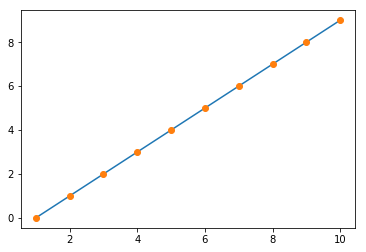

In [94]:
x = np.linspace(1, 10, num=10)
y = np.arange(10)

plt.plot(x, y)
plt.plot(x, y, 'o')

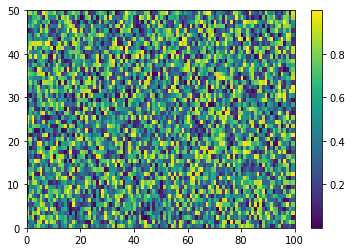

In [99]:
a = np.random.rand(50, 100)

plt.pcolormesh(a)
plt.colorbar()

## Indexing and slicing

Like Python lists, we can index numpy arrays (remember, index starts at 0)

In [100]:
a = np.arange(10)

a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [101]:
a[0], a[1], a[-1]

(0, 1, 9)

Slicing

In [102]:
a[1:4:2]

array([1, 3])

Start, end and/or step in a slice can be omitted

By default start is 0, end is the last item (included) and step is 1.

In [103]:
a[2:]

array([2, 3, 4, 5, 6, 7, 8, 9])

In [104]:
a[:-2]

array([0, 1, 2, 3, 4, 5, 6, 7])

In [105]:
a[:]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Exercice: How to reverse the ordering of the array using slicing?

In [106]:
a[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

For indexing and slicing a multi-dimensional array, use commas (note: dimension order is important!)

In [107]:
a = np.arange(5 * 5).reshape(5, 5)

a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [108]:
a[2, 3]

13

In [110]:
a[0]

array([0, 1, 2, 3, 4])

In [109]:
a[2:, :]

array([[10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

*Exercice*: try extracting the highlighted values (per color) in the array below using indexing and slicing.

<img src="figs/numpy_indexing_ex1.png" width="500px">

In [111]:
a = np.arange(6) + np.arange(0, 51, 10)[:, np.newaxis]

In [112]:
a

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

In [116]:
a[0, 3:5]

array([3, 4])

In [117]:
a[:, 2]

array([ 2, 12, 22, 32, 42, 52])

In [118]:
a[4:, 4:]

array([[44, 45],
       [54, 55]])

In [119]:
a[2::2, ::2]

array([[20, 22, 24],
       [40, 42, 44]])

## Views vs. copies

How to explain this?

In [121]:
a = np.arange(10)

print(a)

b = a[2:6]

b[0] = 1000.

a

[0 1 2 3 4 5 6 7 8 9]


array([   0,    1, 1000,    3,    4,    5,    6,    7,    8,    9])

In the case above, array `b` is a view of array `a`.

A view is an array that share the same memory than its original array. A copy have all values copied in an independent memroy block.
 
Generally, basic indexing and slicing returns views.

`.reshape()` also returns views (precision: not always)

In [122]:
a = np.arange(5 * 5)

b = a.reshape(5, 5)

In [124]:
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [125]:
b

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [126]:
b[2, 2] = 1000

In [127]:
a

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11, 1000,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         22,   23,   24])

In [128]:
b.flatten()

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11, 1000,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         22,   23,   24])

How is it possible to create views for arrays that don't have the same shape?

The elements of (contiguous) Numpy arrays are stored as 1-dimensional sequence, regardless of the number of dimensions.
Access to the elements in the multi-dimensional space is made using *strides*, which are independent of the data itself.

In [133]:
a.strides

(8,)

In [130]:
b.strides

(40, 8)

In [131]:
a.dtype

dtype('int64')

## Fancy Indexing

It is possible to do more advanced indexing, using boolean arrays (masks) or integer arrays (point-wise indexing).


In [135]:
np.random.seed(1)

a = np.random.rand(10)

print(a)

mask = a < 0.5

mask

[  4.17022005e-01   7.20324493e-01   1.14374817e-04   3.02332573e-01
   1.46755891e-01   9.23385948e-02   1.86260211e-01   3.45560727e-01
   3.96767474e-01   5.38816734e-01]


array([ True, False,  True,  True,  True,  True,  True,  True,  True, False], dtype=bool)

In [136]:
a[mask]

array([  4.17022005e-01,   1.14374817e-04,   3.02332573e-01,
         1.46755891e-01,   9.23385948e-02,   1.86260211e-01,
         3.45560727e-01,   3.96767474e-01])

In [137]:
a[a < 0.5]

array([  4.17022005e-01,   1.14374817e-04,   3.02332573e-01,
         1.46755891e-01,   9.23385948e-02,   1.86260211e-01,
         3.45560727e-01,   3.96767474e-01])

In [138]:
a[a < 0.5] = 0.

a

array([ 0.        ,  0.72032449,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.53881673])

Fancy indexing returns copies, not views

In [139]:
b = a[a < 0.5]

b[0] = 1000.

a

array([ 0.        ,  0.72032449,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.53881673])

In [141]:
b

array([ 1000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.])

Indexing with integer arrays (or integer lists, or any iterable)

In [142]:
a = np.arange(0, 100, 10)

a

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [144]:
a[[1, 3, -2]]

array([10, 30, 80])

More surprising, we can index an array with an integer array that doesn't have the same shape

In [146]:
idx = np.array([[2, 5],
                [3, 8]])

a[idx]

array([[20, 50],
       [30, 80]])

*Exercice*: try extracting the highlighted values (per color) in the array below using indexing and/or fancy indexing.

<img src="figs/numpy_indexing_ex2.png" width="500px">

In [147]:
a = np.arange(6) + np.arange(0, 51, 10)[:, np.newaxis]

a

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

In [150]:
mask = np.array([1, 0, 1, 0, 0, 1], dtype='bool')

a[mask, 2]

array([ 2, 22, 52])

In [151]:
a.flatten()[1::7]

array([ 1, 12, 23, 34, 45])

In [152]:
a[(0, 1, 2, 3, 4), (1, 2, 3, 4, 5)]

array([ 1, 12, 23, 34, 45])

In [153]:
idx = np.arange(5)

a[idx, idx + 1]

array([ 1, 12, 23, 34, 45])

In [157]:
a[3::, (0, 2, -1)]

array([[30, 32, 35],
       [40, 42, 45],
       [50, 52, 55]])

In [161]:
data = np.loadtxt('data.csv', delimiter=',', skiprows=1)

In [162]:
data

array([[  2.00000000e+02,   2.40000000e+02],
       [  4.00000000e+02,   5.60000000e+02],
       [  6.00000000e+02,   2.60000000e+08]])

In [159]:
!cat data.csv

"depth", "some_variable"
200, 2.4e2
400, 5.6e2
600, 2.6e8

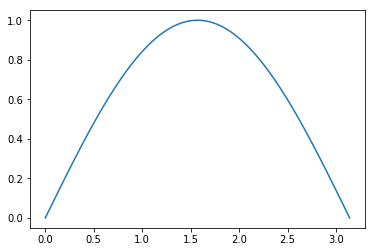

In [181]:
dx = 0.0001

x = np.arange(0, np.pi, dx)

y = np.sin(x)

plt.plot(x, y)

In [197]:
import numba

In [203]:

def curvature(y, dx=dx):
    curv = np.zeros(y.size)

    for i in range(1, x.size-1):
        curv[i] = (y[i+1] - 2 * y[i] + y[i-1] ) / dx**2
    
    return curv

In [205]:
curvature = numba.jit(curvature, nopython=True)

AttributeError: 'CPUDispatcher' object has no attribute '__defaults__'

In [206]:
%timeit curvature(y)

25.9 µs ± 1.24 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [188]:
curv = np.zeros(y.size)


In [196]:
%timeit curv[1:-1] = (y[2:] - 2 * y[1:-1] + y[:-2] ) / dx**2

80.3 µs ± 1.86 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


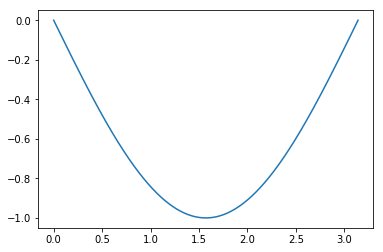

In [189]:
#curv = curvature(y)

plt.plot(x, curv)